<a href="https://www.kaggle.com/code/sitbayevalibek/german-credit-risk?scriptVersionId=135308490" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report , confusion_matrix
from scipy.stats import uniform

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sitbayevalibek/Credit-Risk-dataset/main/german-credit-data-with-risk.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## Data Preparation

In [5]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [6]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [7]:
df[['Saving accounts']] = df[['Saving accounts']].fillna(method='ffill')


In [8]:
df[['Checking account']] = df[['Checking account']].fillna(method='ffill')

In [9]:
df[['Saving accounts']] = df[['Saving accounts']].fillna('moderate')


In [10]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

# Visualization

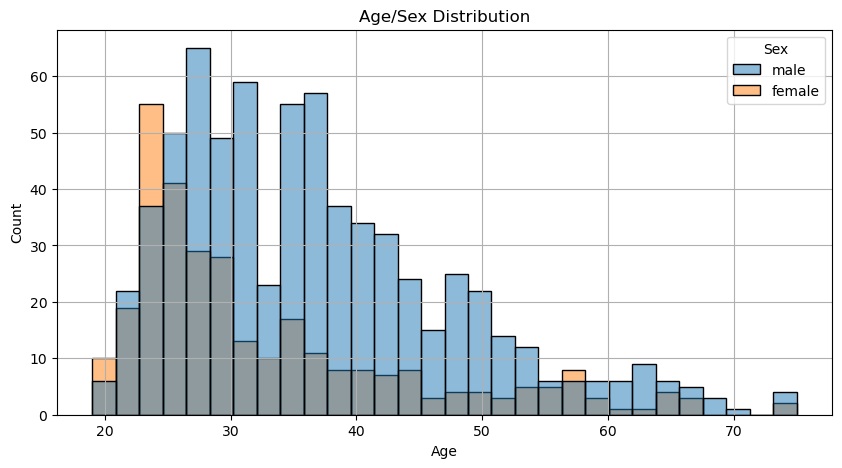

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', bins=30, hue='Sex')
plt.title("Age/Sex Distribution")
plt.grid()
plt.show()

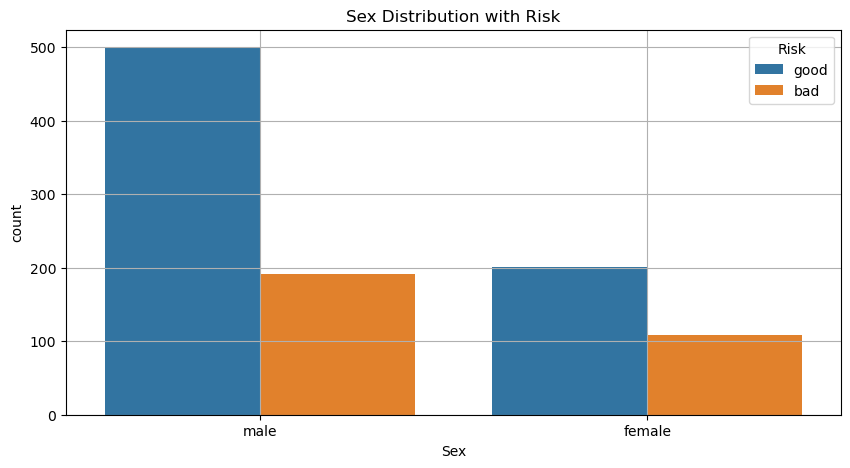

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Sex", hue="Risk")
plt.title("Sex Distribution with Risk")
plt.grid()
plt.show()

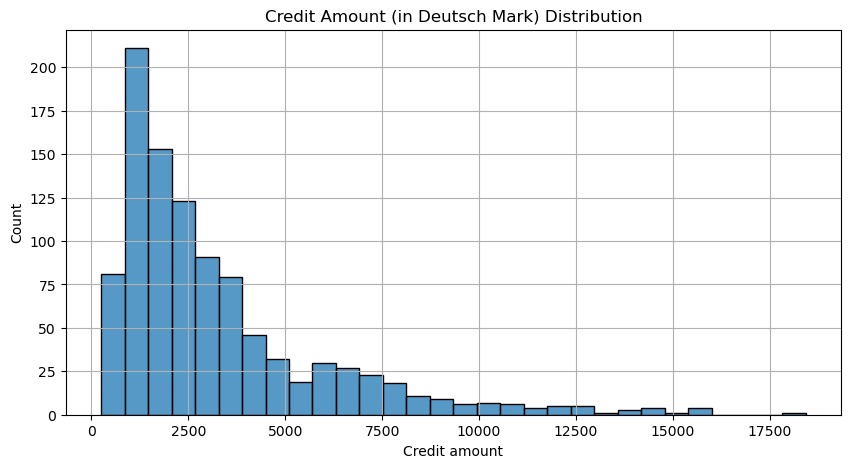

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='Credit amount', bins=30)
plt.title("Credit Amount (in Deutsch Mark) Distribution")
plt.grid()
plt.show()

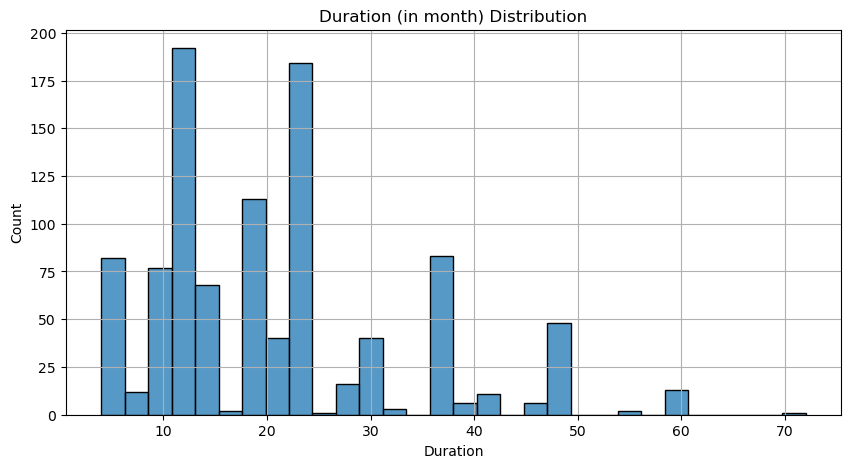

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='Duration', bins=30)
plt.title("Duration (in month) Distribution")
plt.grid()
plt.show()

Analysis:

Age does not affect the risk rating much:

Males take more count of credit from Bank:

Males have lower percentage of bad rating than woman.

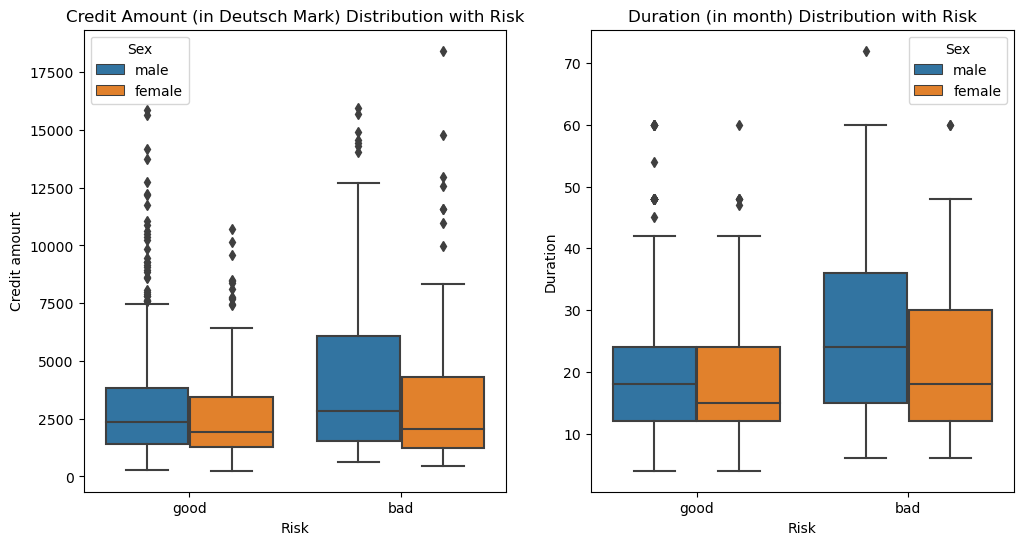

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(data=df, x='Risk', y='Credit amount', hue='Sex', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', hue='Sex', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");


**Analysis**: The higher credit amount and longer duration means higher risk to the bank.

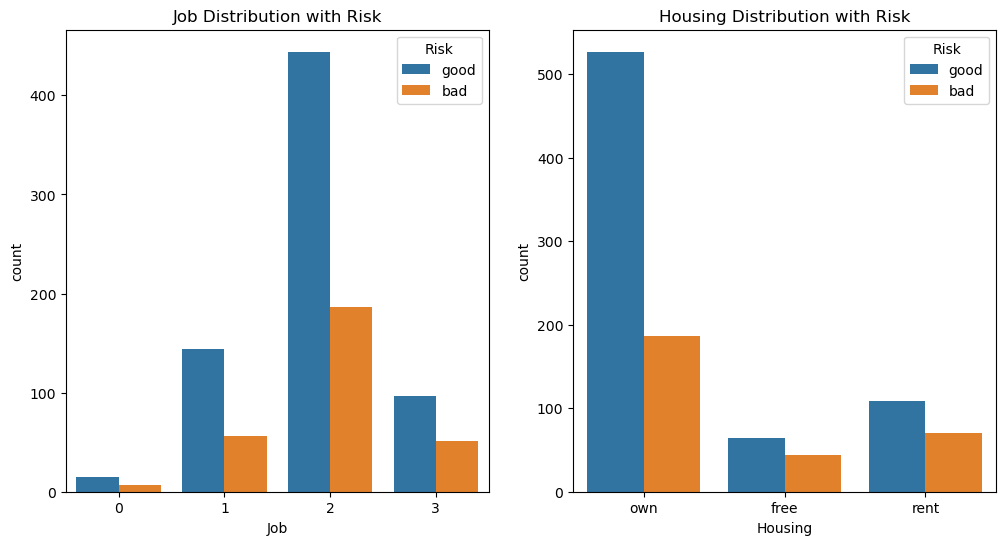

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,moderate,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Encoders

In [18]:
le = LabelEncoder()
col_L  = ['Sex', 'Risk']
df[col_L] = df[col_L].apply(le.fit_transform)

In [19]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,moderate,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,moderate,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0


## Train/Test sets

In [20]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
X_train = train_set.drop("Risk", axis=1)
y = train_set["Risk"].copy()

In [22]:
w = ['Housing', 'Saving accounts', 'Checking account', 'Purpose']
X_num = X_train.drop(w, axis=1)

## Pipeline

In [23]:
num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [24]:
for cat in w:

    pass


In [25]:

num_attribs = list(X_num)
cat_attribs = [cat]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [26]:
X_prepared = full_pipeline.fit_transform(X_train)

In [27]:
X_prepared

array([[ 2.4061873 ,  0.68205679,  0.10704816, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22436411,  0.68205679,  0.10704816, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26628169,  0.68205679,  0.10704816, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.7504744 ,  0.68205679,  0.10704816, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92584449,  0.68205679,  0.10704816, ...,  1.        ,
         0.        ,  0.        ],
       [-1.01352954, -1.46615357,  0.10704816, ...,  1.        ,
         0.        ,  0.        ]])

## Modeling

In [28]:
RF_class = RandomForestClassifier()

Learning

In [29]:
RF_class.fit(X_prepared, y)

RandomForestClassifier()

In [30]:
XG_class = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)

In [31]:
XG_class.fit(X_prepared, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='map', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.99, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=200, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Evalution

In [32]:
X_test = test_set.drop('Risk', axis=1)

In [33]:
y_test = test_set['Risk'].copy()

In [34]:
X_test_prepared = full_pipeline.transform(X_test)

In [35]:
RF_predicted = RF_class.predict(X_test_prepared)

In [36]:
XG_predicted = XG_class.predict(X_test_prepared)

## RF_class Confusion Matrix

              precision    recall  f1-score   support

           0       0.46      0.29      0.35        59
           1       0.74      0.86      0.80       141

    accuracy                           0.69       200
   macro avg       0.60      0.57      0.58       200
weighted avg       0.66      0.69      0.67       200



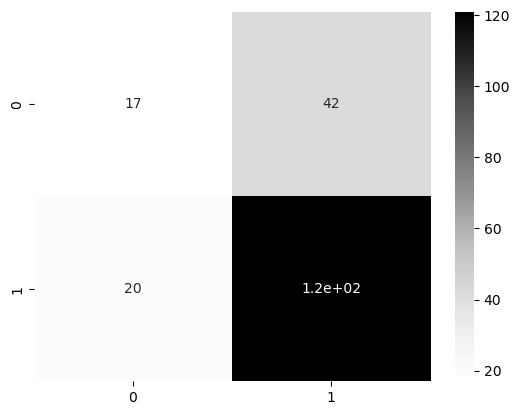

In [37]:
sns.heatmap(confusion_matrix(y_test,RF_predicted),annot=True,cmap='Greys')
print(classification_report(y_test,RF_predicted))

# XG_class Confusion Matrix

              precision    recall  f1-score   support

           0       0.40      0.37      0.39        59
           1       0.74      0.77      0.76       141

    accuracy                           0.65       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.64      0.65      0.65       200



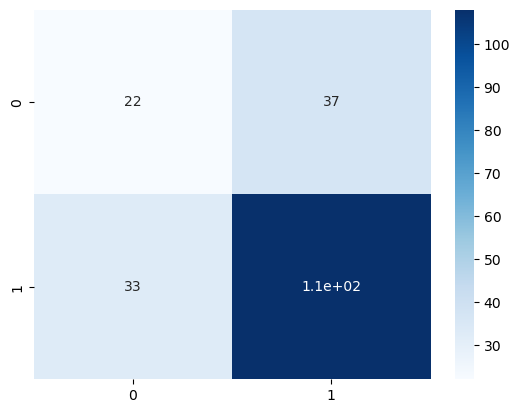

In [38]:
sns.heatmap(confusion_matrix(y_test,XG_predicted),annot=True,cmap='Blues')
print(classification_report(y_test,XG_predicted))

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT_class = DecisionTreeClassifier()

In [40]:
DT_class.fit(X_prepared, y)

DecisionTreeClassifier()

In [41]:
DT_predicted = DT_class.predict(X_test_prepared)

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        59
           1       0.74      0.74      0.74       141

    accuracy                           0.64       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.64      0.64      0.64       200



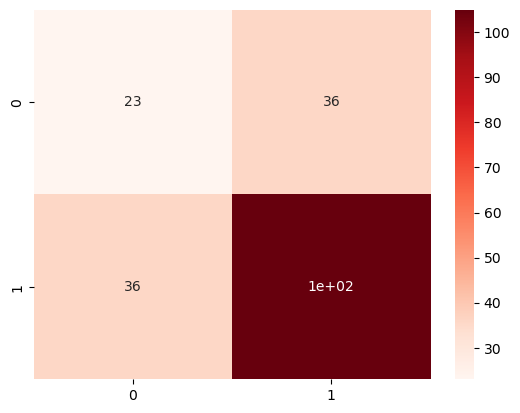

In [42]:
sns.heatmap(confusion_matrix(y_test,DT_predicted),annot=True,cmap='Reds')
print(classification_report(y_test,DT_predicted))

In [43]:
#RandomSearchCV
# define the parameters to tune
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,300),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,20),
              'n_jobs': range(1,7)}
#instance of RandomSearchCV
rs = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=25) #25 iterations

In [44]:
rs_model =  rs.fit(X_prepared, y)

In [45]:
rs_predicted = rs_model.predict(X_test_prepared)

              precision    recall  f1-score   support

           0       0.53      0.14      0.22        59
           1       0.72      0.95      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.54      0.52       200
weighted avg       0.67      0.71      0.64       200



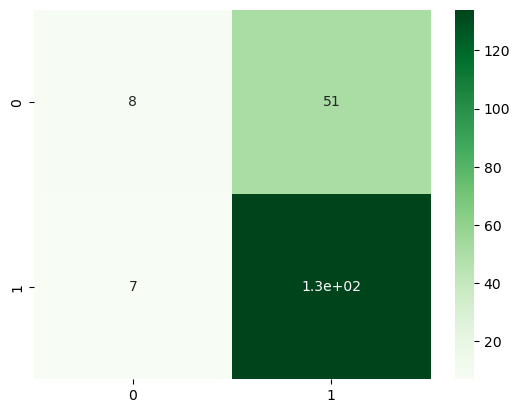

In [46]:
sns.heatmap(confusion_matrix(y_test,rs_predicted),annot=True,cmap='Greens')
print(classification_report(y_test,rs_predicted))

# Conclusion. From the results, it can be seen that rs_model gives the best result.

https://german-risk-credit.streamlit.app/ <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Using